# BloomTech Data Science - Unit 2 Sprint 1 Module 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

# I. Wrangle Data

In [ ]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [ ]:
df = pd.read_csv(DATA_PATH + 'condos/tribeca.csv')

In [ ]:
df.describe()

In [ ]:
df.drop(columns = ['NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY'], inplace = True)

In [ ]:
def wrangle(filepath):
  df = pd.read_csv(filepath,
                   parse_dates=['SALE_DATE'],
                   index_col= ['SALE_DATE'],
                   na_values=[0.0])
  #drop constant columns
  df.drop(columns = ['NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY'], inplace = True)

  #drop high cardinality columns aka the columns that are different in every row
  df.drop(columns = ['ADDRESS', 'APARTMENT_NUMBER'], inplace = True)

  return df

df = wrangle(DATA_PATH + 'condos/tribeca.csv')

In [ ]:
df.head()

,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
SALE_DATE,,,,
2019-01-03,10013.0,1840.0,1909.0,2800000
2019-01-07,10004.0,1759.0,NaN,2650000
2019-01-09,10004.0,1190.0,2005.0,1005000
2019-01-10,NaN,1088.0,2006.0,1678000
2019-01-11,10280.0,873.0,NaN,1380000


# II. Split Data

Split our dataset into a **feature matrix `X`** and a **target vector `y`**.

In [ ]:
X = df[['GROSS_SQUARE_FEET']] #2D
y = df['SALE_PRICE'] #1D

In [ ]:
X.shape,y.shape

((90, 1), (90,))

In [ ]:
X.head(), y.head()

(            GROSS_SQUARE_FEET
 SALE_DATE                    
 2019-01-03             1840.0
 2019-01-07             1759.0
 2019-01-09             1190.0
 2019-01-10             1088.0
 2019-01-11              873.0,
 SALE_DATE
 2019-01-03    2800000
 2019-01-07    2650000
 2019-01-09    1005000
 2019-01-10    1678000
 2019-01-11    1380000
 Name: SALE_PRICE, dtype: int64)

# III. Establish Baseline

If you had a *naïve model* that could only predict one value, how well would you model perform?

In [ ]:
y_baseline_pred = [y.mean()] * len(y)


In [ ]:
print('BASELINE MAE',mean_absolute_error(y,y_baseline_pred))

BASELINE MAE 2783380.1977777784


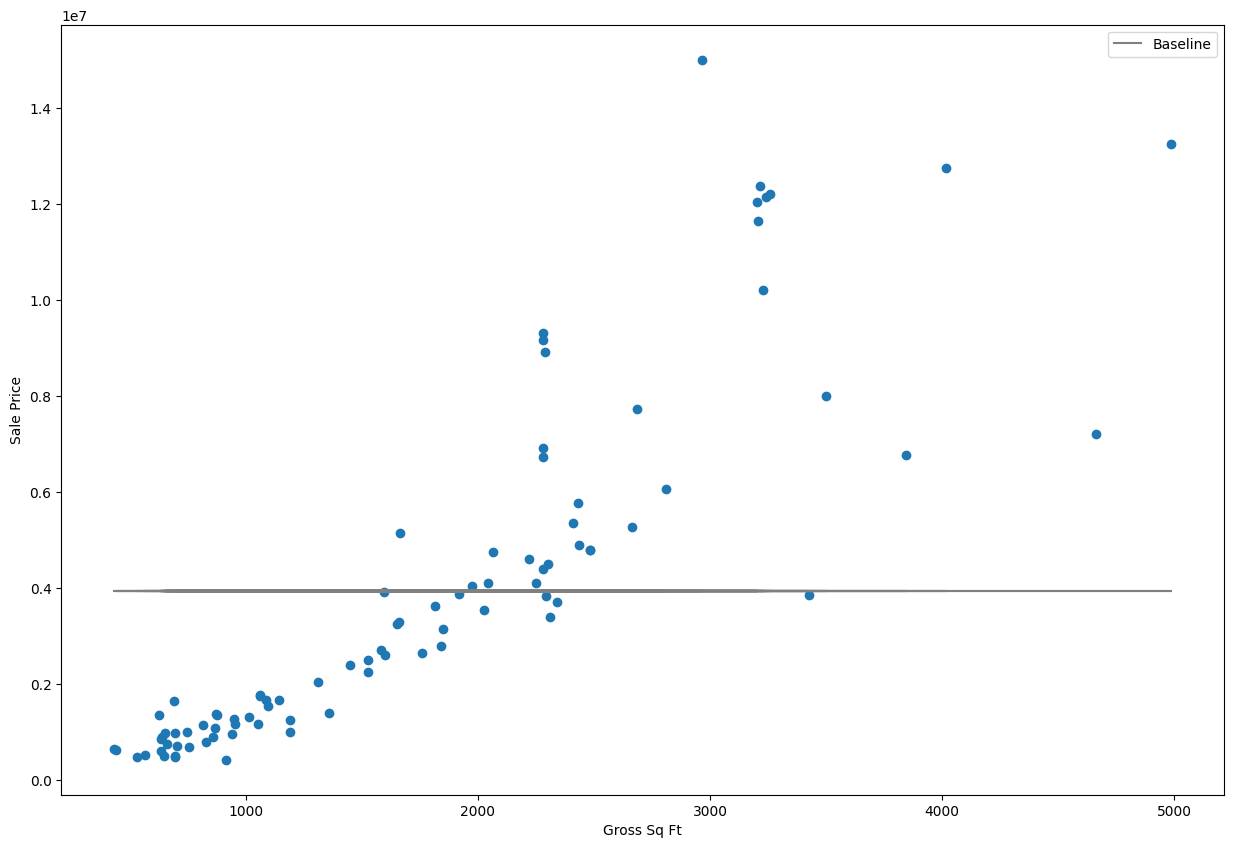

In [ ]:
plt.figure(figsize = (15,10))
plt.scatter(X,y)
plt.plot(X,y_baseline_pred, label = 'Baseline', color = 'grey')
plt.xlabel('Gross Sq Ft')
plt.ylabel('Sale Price')
plt.legend();

# IV. Build Model

In [ ]:
# step one: import predictor class
from sklearn.linear_model import LinearRegression

# step two: instantiate my predictions
model_lr = LinearRegression()

# step three: fit my model
model_lr.fit(X,y)
#step four: make predictions
y_pred_lr = model_lr.predict(X)

# V. Check Metrics

In [ ]:

print('Linear Regression MAE',mean_absolute_error(y,y_pred_lr) )

Linear Regression MAE 1176817.9930150746


# VI. Communicate Results

Plot model

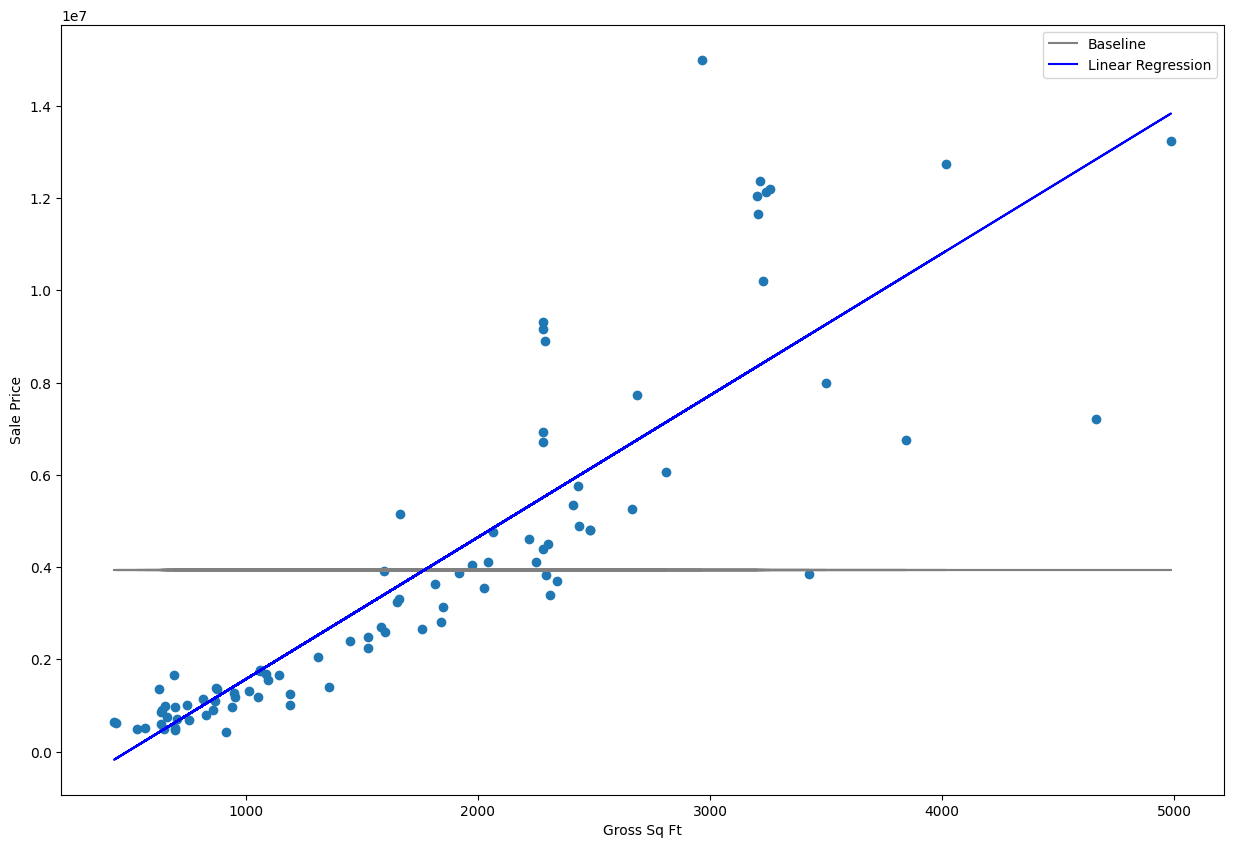

In [ ]:
plt.figure(figsize = (15,10))
plt.scatter(X,y)
plt.plot(X,y_baseline_pred, label = 'Baseline', color = 'grey')
plt.plot(X,y_pred_lr, label = 'Linear Regression', color = 'blue')
plt.xlabel('Gross Sq Ft')
plt.ylabel('Sale Price')
plt.legend();

What are our beta coefficients?

In [ ]:
intercept = round(model_lr.intercept_)
intercept

-1505364

In [ ]:
coef = round(model_lr.coef_[0])
coef

3076

In [ ]:
#final equation
print(f'SALE_PRICE = {intercept} + {coef} * GROSS_SQUARE_FEET')

SALE_PRICE = -1505364 + 3076 * GROSS_SQUARE_FEET
